## Data Analysis
For our analysis, we will go through a sentiment analysis, a word cloud, word frequency and word frequency with N-grams. We will use `SentimentIntensityAnalyzer` from `NLTK` to develop a sentiment analysis. We will create a word cloud by using `wordcloud`. Additionally, we will check the word frequency and N-grams for 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud

In [7]:
# Load CSV file and read the dataset
reviews = pd.read_csv("cleaned_BA_reviews.csv")
texts = reviews['cleaned_reviews']

,Unnamed: 0,reviews,cleaned_reviews
0,0,Not Verified | Took a trip to Nashville with m...,took trip nashville wife leisure break arrived...
1,1,Not Verified | A nightmare journey courtesy o...,nightmare journey courtesy british airway wors...
2,2,✅ Trip Verified | Absolutely atrocious. LHR-OR...,absolutely atrocious lhrordlhr roundtrip briti...
3,3,✅ Trip Verified | As someone who flies relentl...,someone fly relentlessly british airway busine...
4,4,✅ Trip Verified | Flew with British Airways ...,flew british airway club europe saturday 31st ...
...,...,...,...
995,995,✅ Trip Verified | Return flight to Dublin. Ou...,return flight dublin outbound gallery north fi...
996,996,✅ Trip Verified | Barbados to Gatwick. We boa...,barbados gatwick boarded half full flight whil...
997,997,✅ Trip Verified | I would like to praise the ...,would like praise outstanding courtesy service...
998,998,✅ Trip Verified | Madrid to London Heathrow. T...,madrid london heathrow second trip madrid lond...


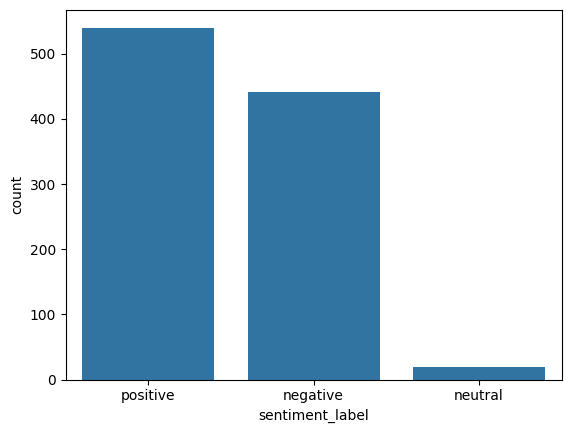

In [8]:
# Sentiment Analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review
reviews['sentiment'] = reviews['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment as positive, negative, or neutral based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

reviews['sentiment_label'] = reviews['sentiment'].apply(classify_sentiment)

# Show the distribution of sentiments
sns.countplot(x='sentiment_label', data=reviews)
plt.show()

In [9]:
# Print the first few rows of the updated DataFrame
print(reviews[['reviews', 'cleaned_reviews', 'sentiment', 'sentiment_label']].head())

                                             reviews  \
0  Not Verified | Took a trip to Nashville with m...   
1  Not Verified |  A nightmare journey courtesy o...   
2  ✅ Trip Verified | Absolutely atrocious. LHR-OR...   
3  ✅ Trip Verified | As someone who flies relentl...   
4  ✅ Trip Verified |   Flew with British Airways ...   

                                     cleaned_reviews  sentiment  \
0  took trip nashville wife leisure break arrived...     0.8655   
1  nightmare journey courtesy british airway wors...    -0.6677   
2  absolutely atrocious lhrordlhr roundtrip briti...    -0.9583   
3  someone fly relentlessly british airway busine...     0.7269   
4  flew british airway club europe saturday 31st ...    -0.8225   

  sentiment_label  
0        positive  
1        negative  
2        negative  
3        positive  
4        negative  


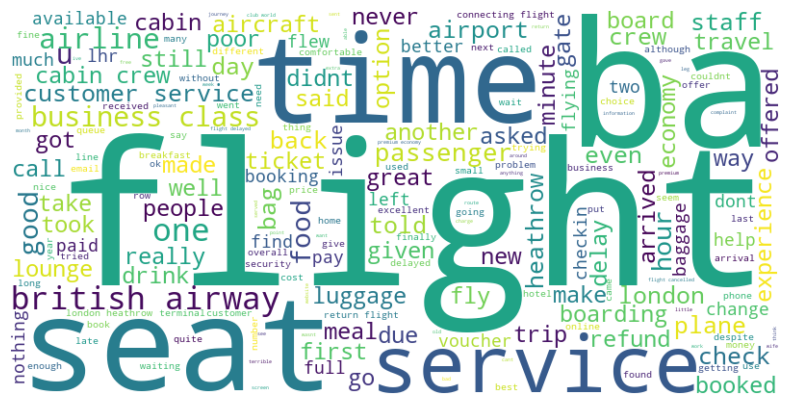

In [12]:
# Join all reviews into a single string for word cloud generation
text_for_analysis = ' '.join(reviews['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=200,
    colormap='viridis',  # Color scheme for the word cloud
    contour_color='black'
).generate(text_for_analysis)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()

In [17]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# split the text into a list of words
words = text_for_analysis.split(' ')

# create a FreqDist object and find the most common words
nlp_words = FreqDist(words).most_common(10)

# create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

Text(0.5, 1.0, 'Top 10 Most Frequent Words')

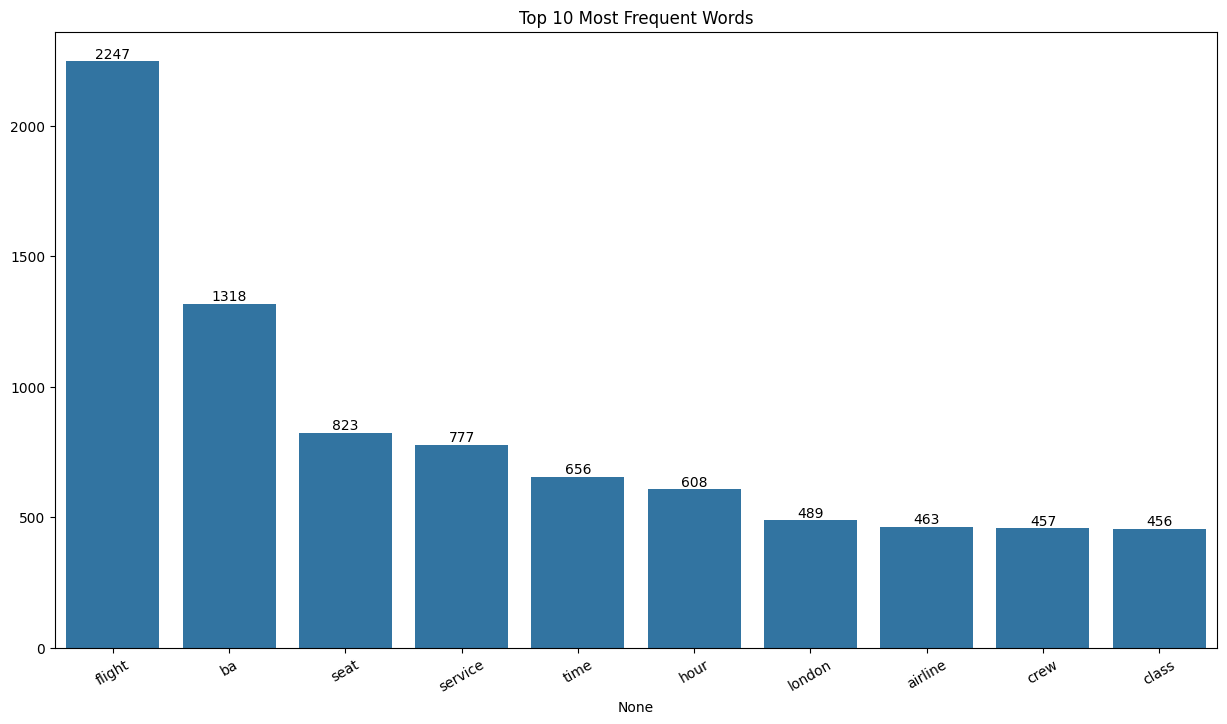

In [19]:
# setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

# Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)
plt.title("Top 10 Most Frequent Words")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'hour'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'class'),
  Text(6, 0, 'food'),
  Text(7, 0, 'business'),
  Text(8, 0, 'good'),
  Text(9, 0, 'staff')])

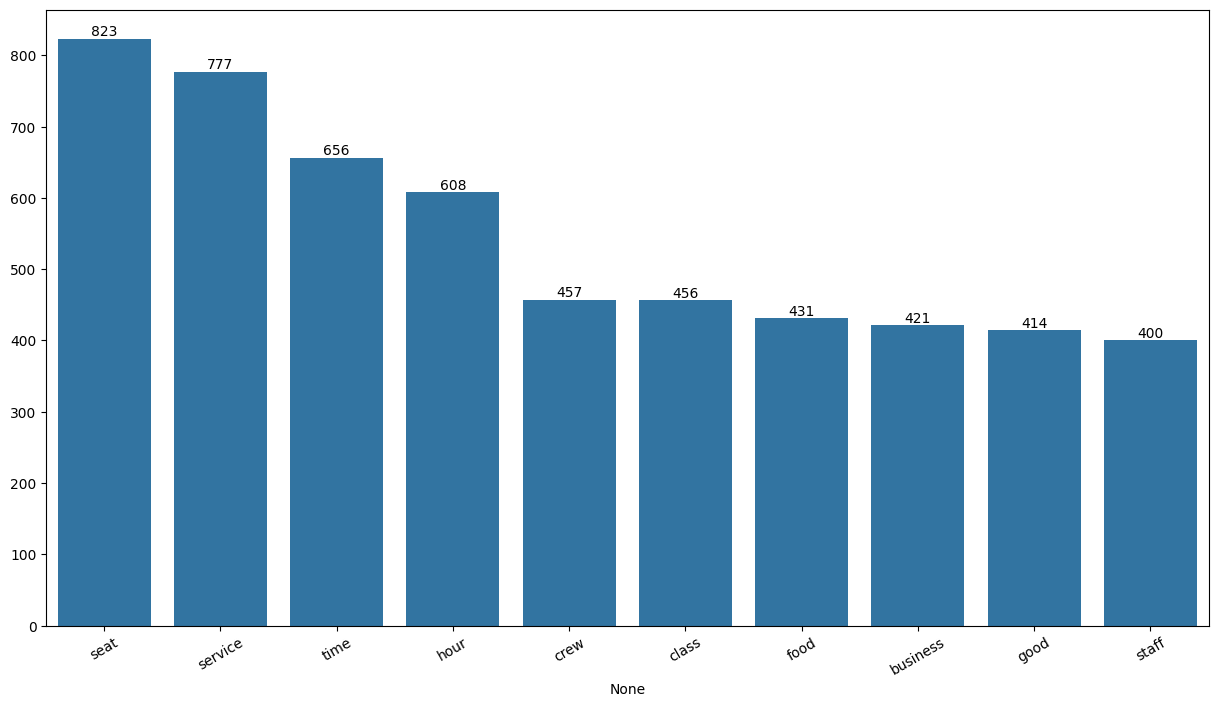

In [20]:
#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_new_words = FreqDist(new_words).most_common(10)

#create a dataframe of these word and its frequencies
all_fdist_new = pd.Series(dict(nlp_new_words))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist_new.index, y=all_fdist_new.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# set n = 3
n = 3

# Define the n-gram range
ngram_vectorizer = CountVectorizer(ngram_range=(n,n), stop_words='english')

# Fit and transform the text data
X_ngram = ngram_vectorizer.fit_transform(reviews['cleaned_reviews'])

# Create a DataFrame with the n-gram counts
ngram_df = pd.DataFrame(X_ngram.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Sum up the n-grams to get their overall frequency
ngram_freq = ngram_df.sum().sort_values(ascending=False)

# Display the top 20 most frequent n-grams
print(ngram_freq.head(20))

business class seat          27
ba customer service          27
fly british airway           21
business class passenger     19
flight delayed hour          19
missed connecting flight     18
business class ticket        17
flight british airway        16
ba business class            15
small bottle water           13
new club world               12
british airway flight        12
new club suite               12
business class flight        12
experience british airway    12
london british airway        11
ba cancelled flight          11
long haul flight             11
business class cabin         11
business class experience    11
dtype: int64


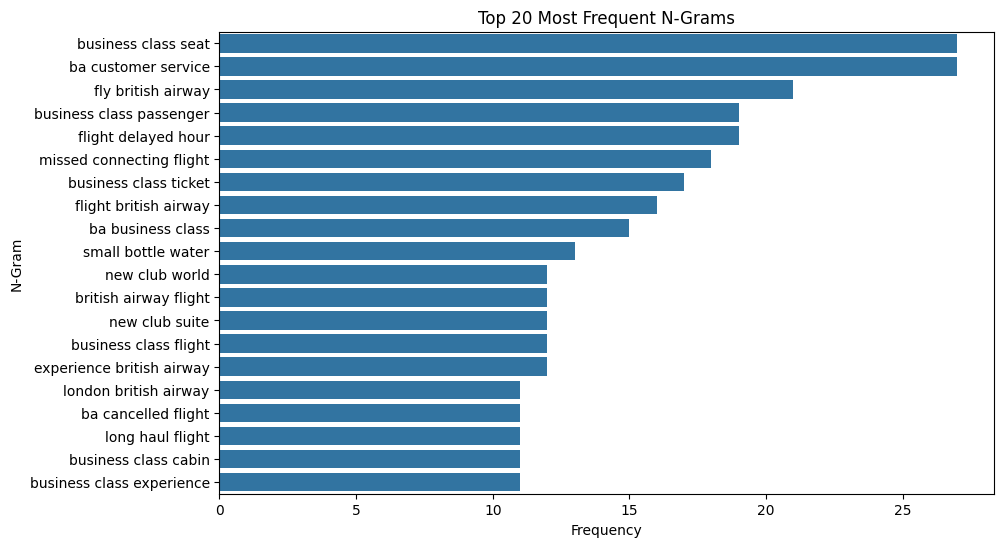

In [16]:
# Plot the top 20 most frequent n-grams
plt.figure(figsize=(10, 6))
sns.barplot(x=ngram_freq.head(20).values, y=ngram_freq.head(20).index)
plt.title("Top 20 Most Frequent N-Grams")
plt.xlabel("Frequency")
plt.ylabel("N-Gram")
plt.show()